## Importar


In [3]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
#importar geopy: pip install geopy

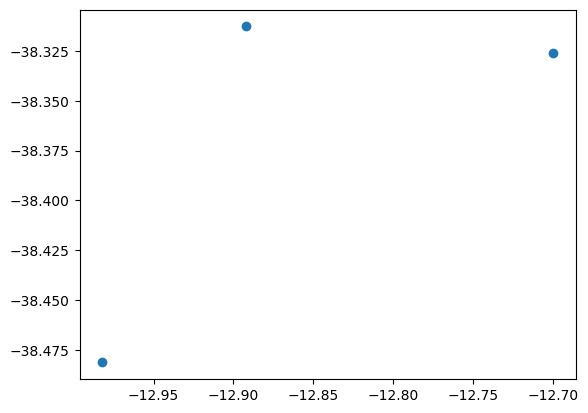

In [4]:
geolocator = Nominatim(user_agent="MyApp")

salvador = []
laurodefreitas = []
camacari = []
location = geolocator.geocode("salvador ,bahia")
salvador = [location.latitude, location.longitude]   
location = geolocator.geocode("lauro de freitas ,bahia")
laurodefreitas = [location.latitude, location.longitude]       
location = geolocator.geocode("camacari ,bahia")
camacari = [location.latitude, location.longitude]

lista = [salvador,camacari,laurodefreitas]
plt.scatter([salvador[0],camacari[0],laurodefreitas[0]], [salvador[1],camacari[1],laurodefreitas[1]])


In [4]:
ncidades = len(lista)
dist = np.empty((ncidades, ncidades))

for i in range(3):
    for j in range(3):
        dist[i][j] = geodesic(lista[i], lista[j]).kilometers
      
print(dist)

[[ 0.         35.49785512 20.81123528]
 [35.49785512  0.         21.35616048]
 [20.81123528 21.35616048  0.        ]]


## Funcoes

(1000,)


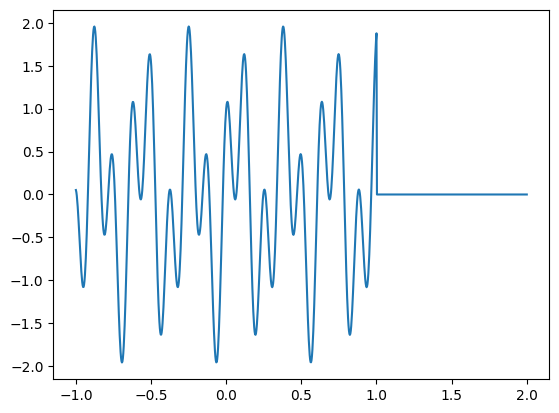

In [1638]:
def function(x):
    if x < -1 or x > 1:
        y = 0
    else:
        y = (np.cos(50*x) + np.sin(20*x))
    return y
xx = np. linspace(-1, 1, num=1000)
fv = np.vectorize(function)
print (fv(xx).shape)

X = np.linspace(-1, 2, num=1000)
plt.plot(X, fv(X))

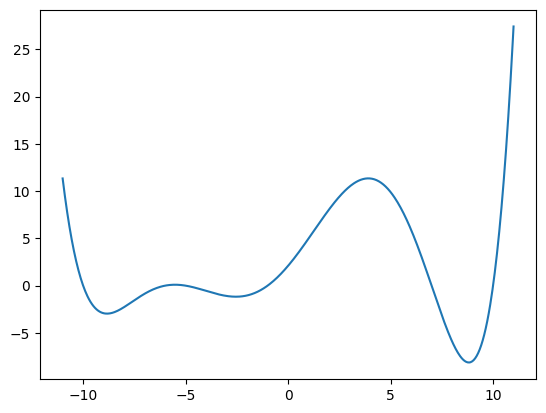

In [1639]:
def function(x):
    return (x+10)*(x+6)*(x+5)*(x+1)*(x-7)*(x-10)/10000
xx = np.linspace(-11,11,600)
x = xx
plt.plot(xx, function(x))
fv = function(x)

## SA

In [1640]:
def SA(search_space, function, T):
    scale = np.sqrt(T) ## Suggested by Robert & Casella (Intro to MC)
    start = np.random.choice(search_space)
    x = start 
    cur = function(x)
    history = [x]
    for i in range(1000):
        candidate = x + np.random.normal()*scale #.uniform(-1, 1, size=1) * scale
        deltae = function(candidate) - cur
        if np.log(np.random.rand()) * T < deltae:
            candidate = x  

        x = candidate

        cur =function(x)
        T = 0.9 *T # reduce temperature by 70% each iteration
        history.append(x)
        
    return x, history
    

## Testes

In [1641]:
X = np. linspace(-1, 1, num=1000)
x1, history = SA(X, function, T = 4)

plt.plot(X, fv(X))
plt.scatter(x1, fv(x1), marker='x')
plt.plot(history, fv(history))

TypeError: 'numpy.ndarray' object is not callable

In [1630]:
X = np. linspace(-11, 11, num=1000)
x1, history = SA(X, function, T = 100)

plt.plot(X, function(X))
plt.scatter(x1, function(x1), marker='x')
plt.plot(history, [function(y) for y in history])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()